In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pandas_datareader.data as web

C:\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [39]:
df = web.DataReader("AAPL", "yahoo", start="2000-1-1", end="2020-6-30") 
# (誰的股票?(AAPL:APPLE的), 從哪個網站讀, 從哪一天開始, 從哪一天結束)
df # adj close: 調整後的收盤價

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,3.674107,3.553571,3.604911,3.671875,40952800.0,3.178732
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,3.460857
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,3.169071
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,3.215448
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.937188
...,...,...,...,...,...,...
2020-06-24,368.790009,358.519989,365.000000,360.059998,48155800.0,360.059998
2020-06-25,365.000000,357.570007,360.700012,364.839996,34380600.0,364.839996
2020-06-26,365.320007,353.019989,364.410004,353.630005,51314200.0,353.630005


In [40]:
P = df["Adj Close"]
P

Date
1999-12-31      3.178732
2000-01-03      3.460857
2000-01-04      3.169071
2000-01-05      3.215448
2000-01-06      2.937188
                 ...    
2020-06-24    360.059998
2020-06-25    364.839996
2020-06-26    353.630005
2020-06-29    361.779999
2020-06-30    364.799988
Name: Adj Close, Length: 5157, dtype: float64

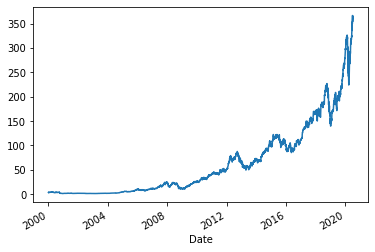

In [41]:
P.plot()

In [42]:
P.diff()

Date
1999-12-31          NaN
2000-01-03     0.282125
2000-01-04    -0.291786
2000-01-05     0.046377
2000-01-06    -0.278260
                ...    
2020-06-24    -6.470001
2020-06-25     4.779999
2020-06-26   -11.209991
2020-06-29     8.149994
2020-06-30     3.019989
Name: Adj Close, Length: 5157, dtype: float64

## 報酬率

In [43]:
r = P.diff() / P # 報酬率
r

Date
1999-12-31         NaN
2000-01-03    0.081519
2000-01-04   -0.092073
2000-01-05    0.014423
2000-01-06   -0.094737
                ...   
2020-06-24   -0.017969
2020-06-25    0.013102
2020-06-26   -0.031700
2020-06-29    0.022527
2020-06-30    0.008278
Name: Adj Close, Length: 5157, dtype: float64

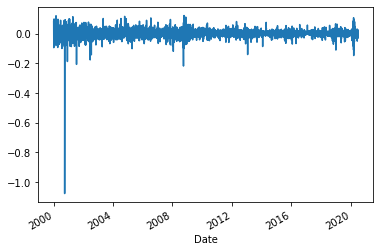

In [44]:
r.plot()

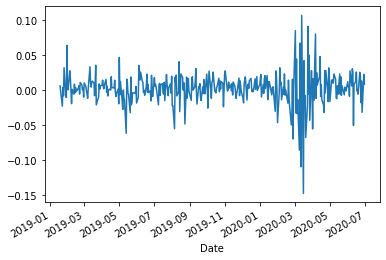

In [45]:
r[-365:].plot()

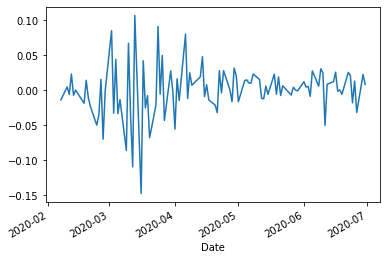

In [46]:
r[-100:].plot()

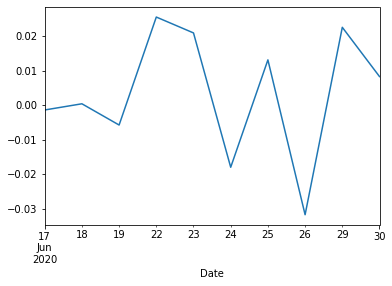

In [47]:
r[-10:].plot()

## 移動平均

In [54]:
P1 = P.rolling(window=10).mean() # rolling: 把(某範圍~某範圍)概括起來; window: 將n個index開個小視窗
P1

Date
1999-12-31           NaN
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
                 ...    
2020-06-24    350.826996
2020-06-25    353.720996
2020-06-26    355.203998
2020-06-29    357.082999
2020-06-30    358.354999
Name: Adj Close, Length: 5157, dtype: float64

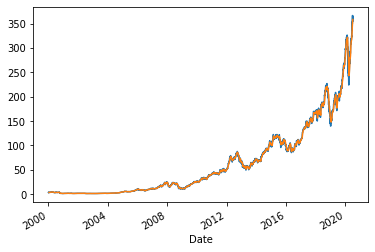

In [55]:
P.plot()
P1.plot()

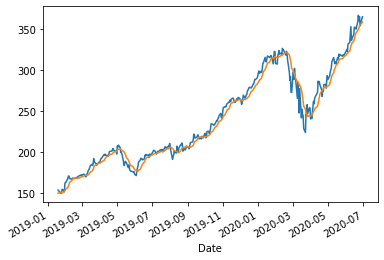

In [56]:
P.tail(365).plot()
P1.tail(365).plot()

In [50]:
P2 = P.rolling(window=200).mean()
P2

Date
1999-12-31           NaN
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
                 ...    
2020-06-24    279.388741
2020-06-25    280.138152
2020-06-26    280.797339
2020-06-29    281.499756
2020-06-30    282.238799
Name: Adj Close, Length: 5157, dtype: float64

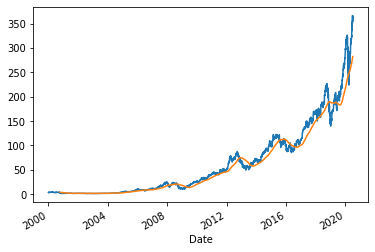

In [51]:
P.plot()
P2.plot()

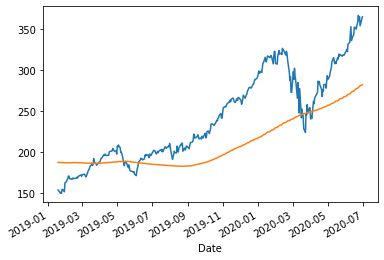

In [57]:
P.tail(365).plot()
P2.tail(365).plot()

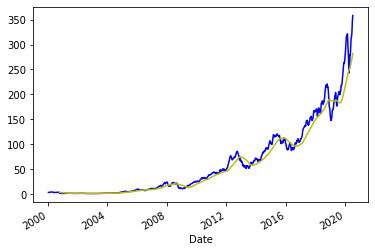

In [60]:
P1.plot(color='b') # 10天
P2.plot(color='y') # 200天

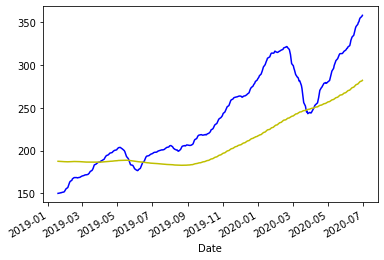

In [61]:
P1.tail(365).plot(color='b')
P2.tail(365).plot(color='y')
# 若短期(藍)上穿長期(黃)，可視為買入的信號；若短期(藍)下穿長期(黃)，可視為賣出的信號